In [1]:
import os
from src.dataPipeline import DataPipeline
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)

os.chdir('..')

dp = DataPipeline()
df = dp.runPipeline(normalizeAndStandardize=False, web=True)

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:45: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:72: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:77: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=50)
df['region_group'] = kmeans.fit_predict(df[['lon', 'lat']])

C:\Users\denis\AppData\Local\Temp\ipykernel_20880\2146409914.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['region_group'] = kmeans.fit_predict(df[['lon', 'lat']])


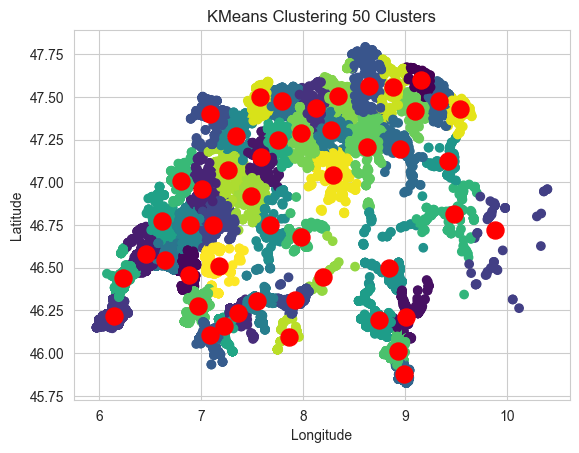

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['lon'], df['lat'], c=df['region_group'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red')
plt.title('KMeans Clustering 50 Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()